In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np

In [11]:
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

NameError: name 'matplotlib' is not defined

In [12]:
data=pd.read_csv("SDG.csv", encoding='euc-kr')

In [13]:
len(data)

648

In [14]:
data.head()

,노선,시간대,교통량,구분
0,내부순환로,0,4455,평일
1,내부순환로,1,3328,평일
2,내부순환로,2,2668,평일
3,내부순환로,3,2440,평일
4,내부순환로,4,3030,평일


In [15]:
order=list(range(1,649))

traffic = pd.DataFrame(data, index=list(range(1,648)))
traffic.tail(10)

,노선,시간대,교통량,구분
638,강남순환로,14,6075,휴일
639,강남순환로,15,6406,휴일
640,강남순환로,16,6873,휴일
641,강남순환로,17,6895,휴일
642,강남순환로,18,6235,휴일
643,강남순환로,19,5206,휴일
644,강남순환로,20,4746,휴일
645,강남순환로,21,4407,휴일
646,강남순환로,22,3595,휴일
647,강남순환로,23,2291,휴일


In [16]:
avg=data.groupby('시간대')[['교통량']].mean()
avg

,교통량
시간대,
0,4843.555556
1,3633.481481
2,2756.333333
3,2302.777778
4,2575.000000
5,4476.296296
6,6651.037037
7,7130.740741
8,7761.481481


In [17]:
line=data.groupby('노선')[['교통량']].mean()
line

,교통량
노선,
강남순환로,4540.819444
강변북로,10230.472222
경부고속도로,8357.902778
내부순환로,6534.958333
동부간선도로,6120.388889
북부간선도로,4447.083333
분당수서로,5531.027778
서부간선도로,4310.986111
올림픽대로,10289.472222


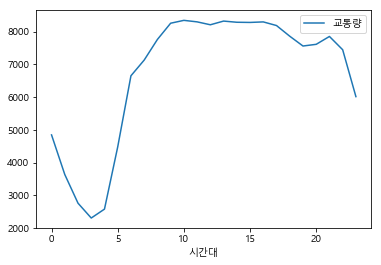

In [18]:
avg.plot()

In [19]:
type(avg)

pandas.core.frame.DataFrame

In [20]:
import seaborn as sns

C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


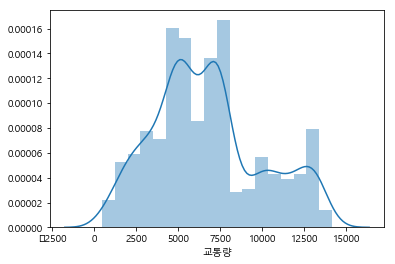

In [32]:
ax=plt.subplots()
ax=sns.distplot(data['교통량'].T)

Text(0.5,1,'시간대별 교통량')

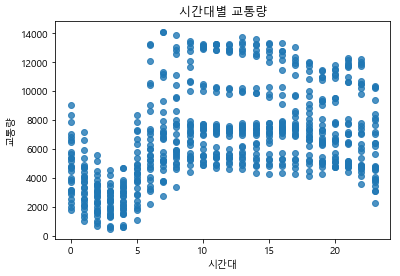

In [22]:
time=sns.regplot(x="시간대", y="교통량", data=data, fit_reg=False)
time.set_title("시간대별 교통량")

C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


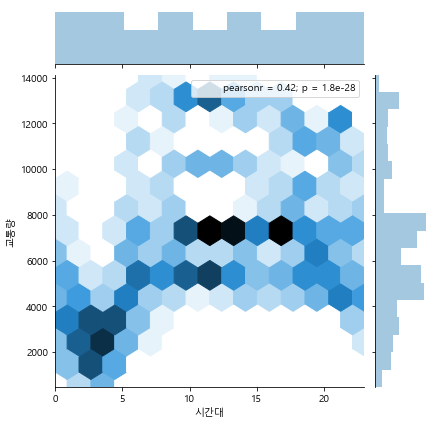

In [36]:
x1=np.linspace(0,23)
x1=sns.jointplot(x="시간대", y="교통량", data=data,  kind='hex')


Text(0.5,1,'시간대별 교통량')

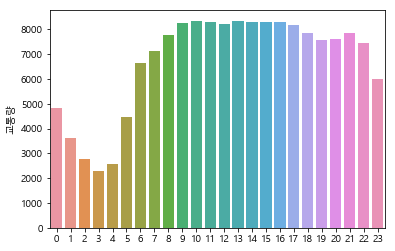

In [24]:
sns.barplot(x=list(range(0,24)), y="교통량", data=avg)
ax.set_title("시간대별 교통량")

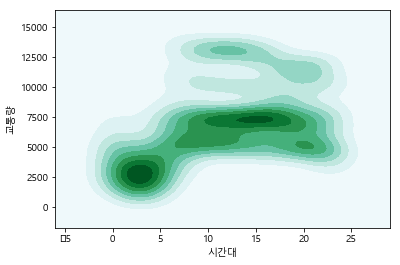

In [25]:
ax=sns.kdeplot(data=data['시간대'],data2=data['교통량'], shade="True") 

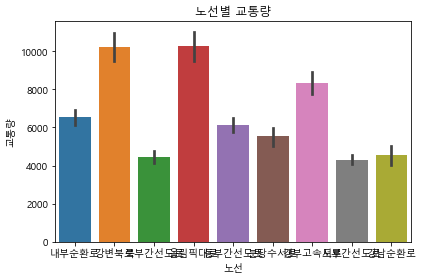

In [26]:
ax=sns.barplot(x="노선", y="교통량", data=data)
ax.set_title("노선별 교통량")
ax.set_xlabel("노선")
ax.set_ylabel("교통량")
plt.tight_layout()

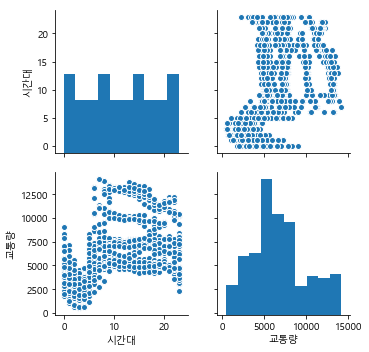

In [27]:
fig=sns.pairplot(data) 

C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\B-7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


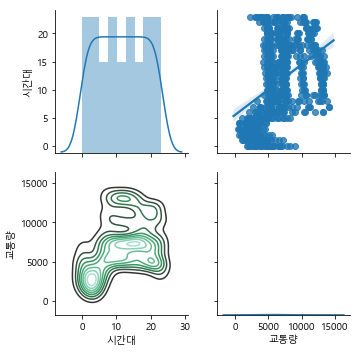

In [29]:
pair_grid=sns.PairGrid(data)
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.distplot, rug=True)